In [7]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline  

In [4]:
wine = pd.read_csv('winequality.csv', sep=';')

In [5]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
wine.shape

(6497, 13)

## Exploratory Data Analysis

Primeiro vamos verificar a variável resposta: `quality`

### Quality

In [11]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

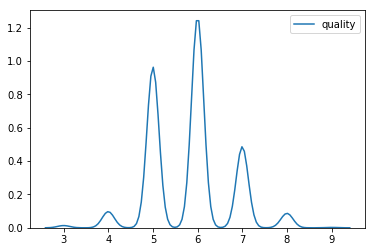

In [10]:
sns.kdeplot(wine.quality);

Apesar da descrição do desafio dizer que os valores estão entre 0 e 10, o dataset só possui valores entre 3 e 9. Percebemos também que existem apenas notas com valores inteiros.

### type

In [13]:
wine.type.value_counts()

White    4898
Red      1599
Name: type, dtype: int64

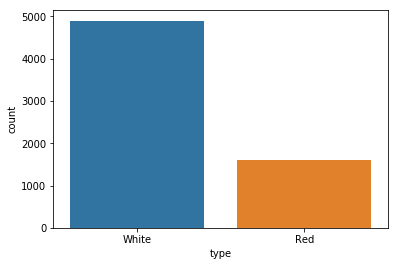

In [18]:
sns.countplot(x="type", data=wine)

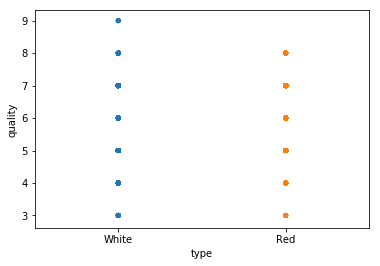

In [20]:
sns.stripplot(x="type", y="quality", data=wine);

Percebemos que há um número maior de vinhos Vermelhos do que vinhos Brancos. Comparando-se com a variável resposta vemos que o tipo do vinho branco possui notas 9, o que não acontece com o vinho vermelho. 

### fixed acidity